## Data Understanding

In [1]:
import pandas as pd #loading our data
churn_df = pd.read_csv('customer_churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_df.shape

(7043, 21)

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print ("\nMissing values :  ", churn_df.isnull().sum().values.sum())


Missing values :   0


In [6]:
churn_df['Churn'].value_counts(sort = False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
columns = churn_df.columns
print("Numerical data field\n")
for i in range(len(columns)):
    if churn_df[columns[i]].dtypes!=object:
        print("unique number of {} -> {}".format(columns[i], len(churn_df[columns[i]].unique())))
        
print("\nCategorical data field\n")
for i in range(len(columns)):
    if churn_df[columns[i]].dtypes==object:
        print("unique number of {} -> {}".format(columns[i], len(churn_df[columns[i]].unique())))

Numerical data field

unique number of SeniorCitizen -> 2
unique number of tenure -> 73
unique number of MonthlyCharges -> 1585

Categorical data field

unique number of customerID -> 7043
unique number of gender -> 2
unique number of Partner -> 2
unique number of Dependents -> 2
unique number of PhoneService -> 2
unique number of MultipleLines -> 3
unique number of InternetService -> 3
unique number of OnlineSecurity -> 3
unique number of OnlineBackup -> 3
unique number of DeviceProtection -> 3
unique number of TechSupport -> 3
unique number of StreamingTV -> 3
unique number of StreamingMovies -> 3
unique number of Contract -> 3
unique number of PaperlessBilling -> 2
unique number of PaymentMethod -> 4
unique number of TotalCharges -> 6531
unique number of Churn -> 2


In [8]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
churn_df = churn_df.drop(['customerID'], axis=1)

In [10]:
churn_df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
import numpy as np
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(' ', np.nan, regex=True)

In [12]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges']) 

In [13]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [14]:
churn_df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

No     5174
Yes    1869
Name: Churn, dtype: int64

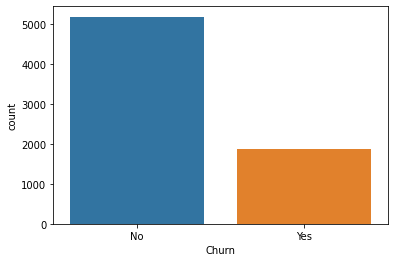

In [15]:
import seaborn as sns
sns.countplot(x = "Churn", data = churn_df)
churn_df['Churn'].value_counts()


There is clearly a serious imbalance between the classes. The imbalance in this dataset is well shown in the graph. In the future, this may reduce the performance of our machine learning model despite the fact that typically performance on a minority of classes is most important. So, we will use some methods to oversample the minority class.

In [16]:
categorical_feature = churn_df.dtypes==object
final_categorical_feature = churn_df.columns[categorical_feature].tolist()

#..........................................................................
numeric_feature = churn_df.dtypes!=object
final_numeric_feature = churn_df.columns[numeric_feature].tolist()

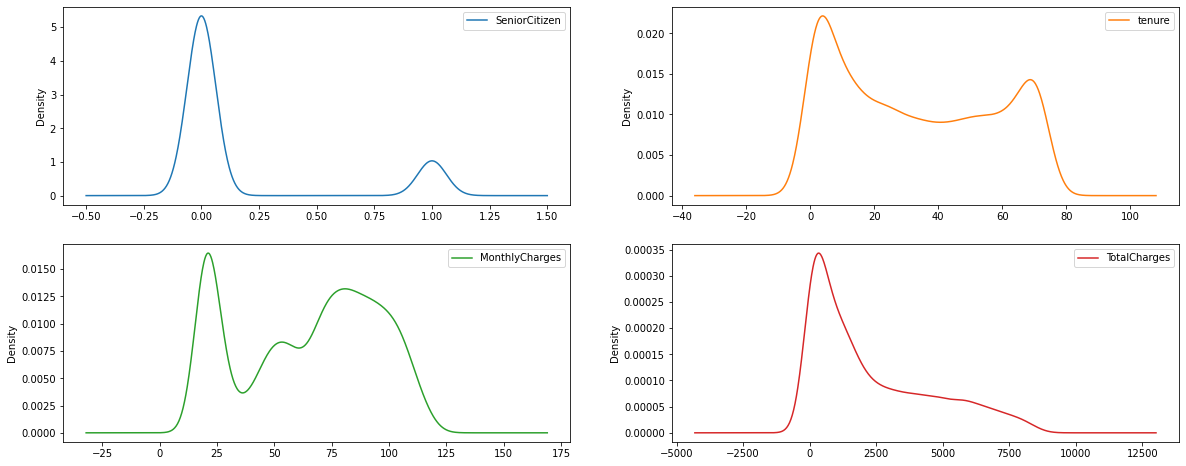

In [17]:
import matplotlib.pyplot as plt
churn_df[final_numeric_feature].plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize= (20,8))
plt.show()

## Preprocessing

#### Managing numerical field data

In [18]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].fillna(churn_df.TotalCharges.median())
#The mean is used for normal number distributions, which have a low amount of outliers.
#The median is generally used to return the central tendency for skewed number distributions.

In [19]:
churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
churn_df["Churn"][churn_df["Churn"]=="No"].groupby(by=churn_df["gender"]).count()


gender
Female    2549
Male      2625
Name: Churn, dtype: int64

In [21]:
churn_df["Churn"][churn_df["Churn"]=="Yes"].groupby(by=churn_df["gender"]).count()


gender
Female    939
Male      930
Name: Churn, dtype: int64

There is negligible difference in customer count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

## Data Visualization

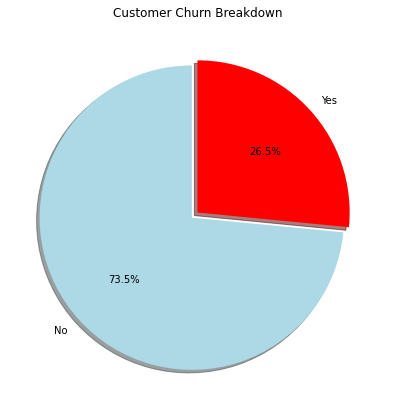

In [22]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from pylab import rcParams # Customize Matplotlib plots using rcParams

# Data to plot
labels = churn_df['Churn'].value_counts(sort = True).index
sizes = churn_df['Churn'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

In [23]:
churn_df.groupby(["Contract"])["Churn"].count().sort_values()

Contract
One year          1473
Two year          1695
Month-to-month    3875
Name: Churn, dtype: int64

In [24]:
churn_df["Churn"][churn_df["Churn"]=="No"].groupby(by=churn_df["Contract"]).value_counts()

Contract        Churn
Month-to-month  No       2220
One year        No       1307
Two year        No       1647
Name: Churn, dtype: int64

In [25]:
churn_df["Churn"][churn_df["Churn"]=="Yes"].groupby(by=churn_df["Contract"]).value_counts()

Contract        Churn
Month-to-month  Yes      1655
One year        Yes       166
Two year        Yes        48
Name: Churn, dtype: int64

In [26]:
import plotly.graph_objects as go

labels = churn_df['Contract'].unique()
values = churn_df['Contract'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text="<i>Customer contract distribution<i>")
fig.show()

As can also be seen from the graph, a higher percentage of customer churn occurs for those with a monthly contract. But more importantly, consider the percentage of people who have left separately. So, about 76% of customer with Month-to-Month Contract (it is 1655 from 7043), chose to leave, while just only 13% of customerts with One Year Contract (it is 1655 from 7043) and about 3% of Two Year Contract opted to churn. (it is 48 from 7043)

In [27]:
churn_df["Churn"][churn_df["Churn"]=="No"].groupby(by=churn_df["PaymentMethod"]).value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
Credit card (automatic)    No       1290
Electronic check           No       1294
Mailed check               No       1304
Name: Churn, dtype: int64

In [28]:
churn_df["Churn"][churn_df["Churn"]=="Yes"].groupby(by=churn_df["PaymentMethod"]).value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  Yes       258
Credit card (automatic)    Yes       232
Electronic check           Yes      1071
Mailed check               Yes       308
Name: Churn, dtype: int64

In [29]:
import plotly.express as px
fig = px.histogram(churn_df, x="Churn", color="PaymentMethod", barmode="group", title="<i>Payment Method Distribution<i>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

There was no particular difference in the data, apart from one point with e-check customers being more likely to leave.

In [30]:
churn_df["Churn"][churn_df["Churn"]=="No"].groupby(by=churn_df["Dependents"]).value_counts()

Dependents  Churn
No          No       3390
Yes         No       1784
Name: Churn, dtype: int64

In [31]:
churn_df["Churn"][churn_df["Churn"]=="Yes"].groupby(by=churn_df["Dependents"]).value_counts()

Dependents  Churn
No          Yes      1543
Yes         Yes       326
Name: Churn, dtype: int64

In [32]:
import plotly.express as px
color_map = {"Yes": "#82E0AA", "No": "#85C1E9"}
fig = px.histogram(churn_df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers without dependents are more likely to churn

In [33]:
churn_df["Churn"][churn_df["Churn"]=="No"].groupby(by=churn_df["Partner"]).value_counts()

Partner  Churn
No       No       2441
Yes      No       2733
Name: Churn, dtype: int64

In [34]:
churn_df["Churn"][churn_df["Churn"]=="Yes"].groupby(by=churn_df["Partner"]).value_counts()

Partner  Churn
No       Yes      1200
Yes      Yes       669
Name: Churn, dtype: int64

In [35]:
import plotly.express as px
color_map = {"Yes": "#E74C3C", "No": "#5D6D7E"}
fig = px.histogram(churn_df, x="Churn", color="Partner", barmode="group", title="<b>Partners distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

#### Managing outliers

In [36]:
Q1 = churn_df.quantile(0.25)
Q3 = churn_df.quantile(0.75)
IQR = Q3 - Q1

In [37]:
from scipy import stats
from scipy.stats import shapiro
for i in range(len(final_numeric_feature)):
    stat,p = shapiro(churn_df[final_numeric_feature[i]])
    print(final_numeric_feature[i])
    print('P_value=%.3f' % (p))

SeniorCitizen
P_value=0.000
tenure
P_value=0.000
MonthlyCharges
P_value=0.000
TotalCharges
P_value=0.000


c:\Users\Telli\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning:

p-value may not be accurate for N > 5000.



H0 (null-hypothesis) says that our data is normal distributed. Our p-value is 0.000. So it is less than 0.05 and so H0 is rejected. Conlusion: Numerical fields do not follow the normal distribution.

SeniorCitizen

lower outlier: 0 and upper outlier: 1142



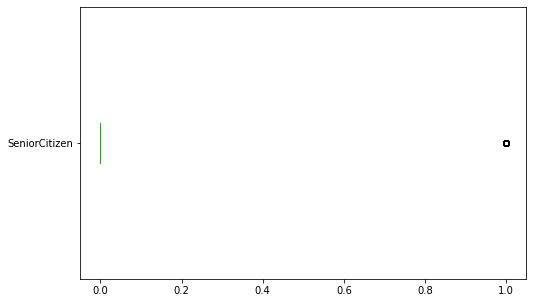

tenure

lower outlier: 0 and upper outlier: 0



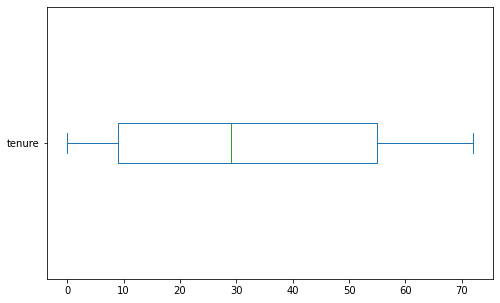

MonthlyCharges

lower outlier: 0 and upper outlier: 0



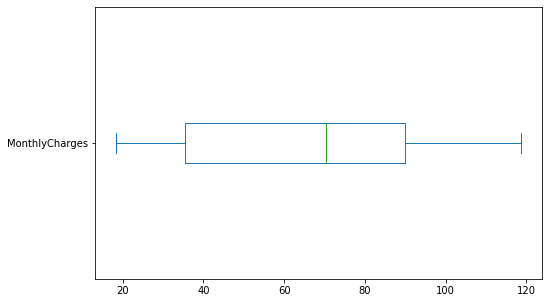

TotalCharges

lower outlier: 0 and upper outlier: 0



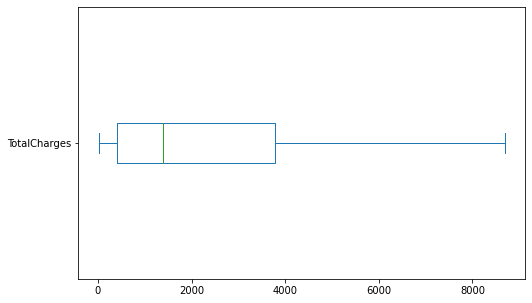

In [38]:
def outlier_detect(churn_df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return churn_df[((churn_df[col] < (q1_col - 1.5 * iqr_col)) |(churn_df[col] > (q3_col + 1.5 * iqr_col)))]

# ----------------------------------------------
def outlier_detect_normal(churn_df, col):
    m = churn_df[col].mean()
    s = churn_df[col].std()
    return churn_df[((churn_df[col]-m)/s).abs()>3]

# ----------------------------------------------
def lower_outlier(churn_df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = churn_df[(churn_df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# ----------------------------------------------
def upper_outlier(churn_df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = churn_df[(churn_df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# ----------------------------------------------
def preprocess(churn_df, col):
    print("{}\n".format(col))
    print("lower outlier: {} and upper outlier: {}\n".format(lower_outlier(churn_df,col).shape[0], upper_outlier(churn_df,col).shape[0]))
    plt.figure(figsize=(8,5))
    churn_df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.show()

from sklearn import preprocessing
for i in range(len(final_numeric_feature)):
    preprocess(churn_df[final_numeric_feature], final_numeric_feature[i])

Senior Citizen is binary field, so 1142 is not outlier data.

In [39]:
for i in range(len(final_categorical_feature)):
    print("\n{}".format(final_categorical_feature[i]))
    print(churn_df[final_categorical_feature[i]].unique())


gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']


In [40]:
df_dummy = pd.get_dummies(churn_df, prefix=['Contract', 'PaymentMethod'],columns=['Contract', 'PaymentMethod'], drop_first=True)
df_dummy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Yes,29.85,29.85,No,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,56.95,1889.50,No,1,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Yes,53.85,108.15,Yes,0,0,0,0,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,42.30,1840.75,No,1,0,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Yes,70.70,151.65,Yes,0,0,0,1,0


In [41]:
final_categorical_feature.remove('Contract')
final_categorical_feature.remove('PaymentMethod')

In [42]:
df_dummy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Yes,29.85,29.85,No,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,56.95,1889.50,No,1,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Yes,53.85,108.15,Yes,0,0,0,0,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,42.30,1840.75,No,1,0,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Yes,70.70,151.65,Yes,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,84.80,1990.50,No,1,0,0,0,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,103.20,7362.90,No,1,0,1,0,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Yes,29.60,346.45,No,0,0,0,1,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Yes,74.40,306.60,Yes,0,0,0,0,1


In [43]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
le = LabelEncoder() 
df_dummy[final_categorical_feature] = df_dummy[final_categorical_feature].apply(lambda col: le.fit_transform(col)) 
df_dummy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,0,2,...,0,1,29.85,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,56.95,1889.50,0,1,0,0,0,1
2,1,0,0,0,2,1,0,0,2,2,...,0,1,53.85,108.15,1,0,0,0,0,1
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,0,1,0,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,1,70.70,151.65,1,0,0,0,1,0


In [44]:
df_dummy = df_dummy.drop_duplicates() #manage duplicated data

In [45]:
df_dummy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,0,2,...,0,1,29.85,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,56.95,1889.50,0,1,0,0,0,1
2,1,0,0,0,2,1,0,0,2,2,...,0,1,53.85,108.15,1,0,0,0,0,1
3,1,0,0,0,45,0,1,0,2,0,...,0,0,42.30,1840.75,0,1,0,0,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,1,70.70,151.65,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,1,84.80,1990.50,0,1,0,0,0,1
7039,0,0,1,1,72,1,2,1,0,2,...,2,1,103.20,7362.90,0,1,0,1,0,0
7040,0,0,1,1,11,0,1,0,2,0,...,0,1,29.60,346.45,0,0,0,0,1,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,1,74.40,306.60,1,0,0,0,0,1


In [46]:
#Scaling Numerical columns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

# Scale data
scaled = std.fit_transform(churn_df[final_numeric_feature])
scaled = pd.DataFrame(scaled,columns=final_numeric_feature)

#dropping original values merging scaled values for numerical columns
df_telcom_og = churn_df.copy()
churn_df = churn_df.drop(columns = final_numeric_feature,axis = 1)
churn_df = churn_df.merge(scaled, left_index=True, right_index=True, how = "left")

#churn_df.info()
churn_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,-0.439916,-1.277445,-1.160323,-0.994242
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,-0.439916,0.066327,-0.259629,-0.173244
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-0.439916,-1.236724,-0.362660,-0.959674
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,-0.439916,0.514251,-0.746535,-0.194766
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,-0.439916,-1.236724,0.197365,-0.940470


In [47]:
# check that nulls have been removed
churn_df[churn_df.isnull().any(axis=1)]

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges


<AxesSubplot:>

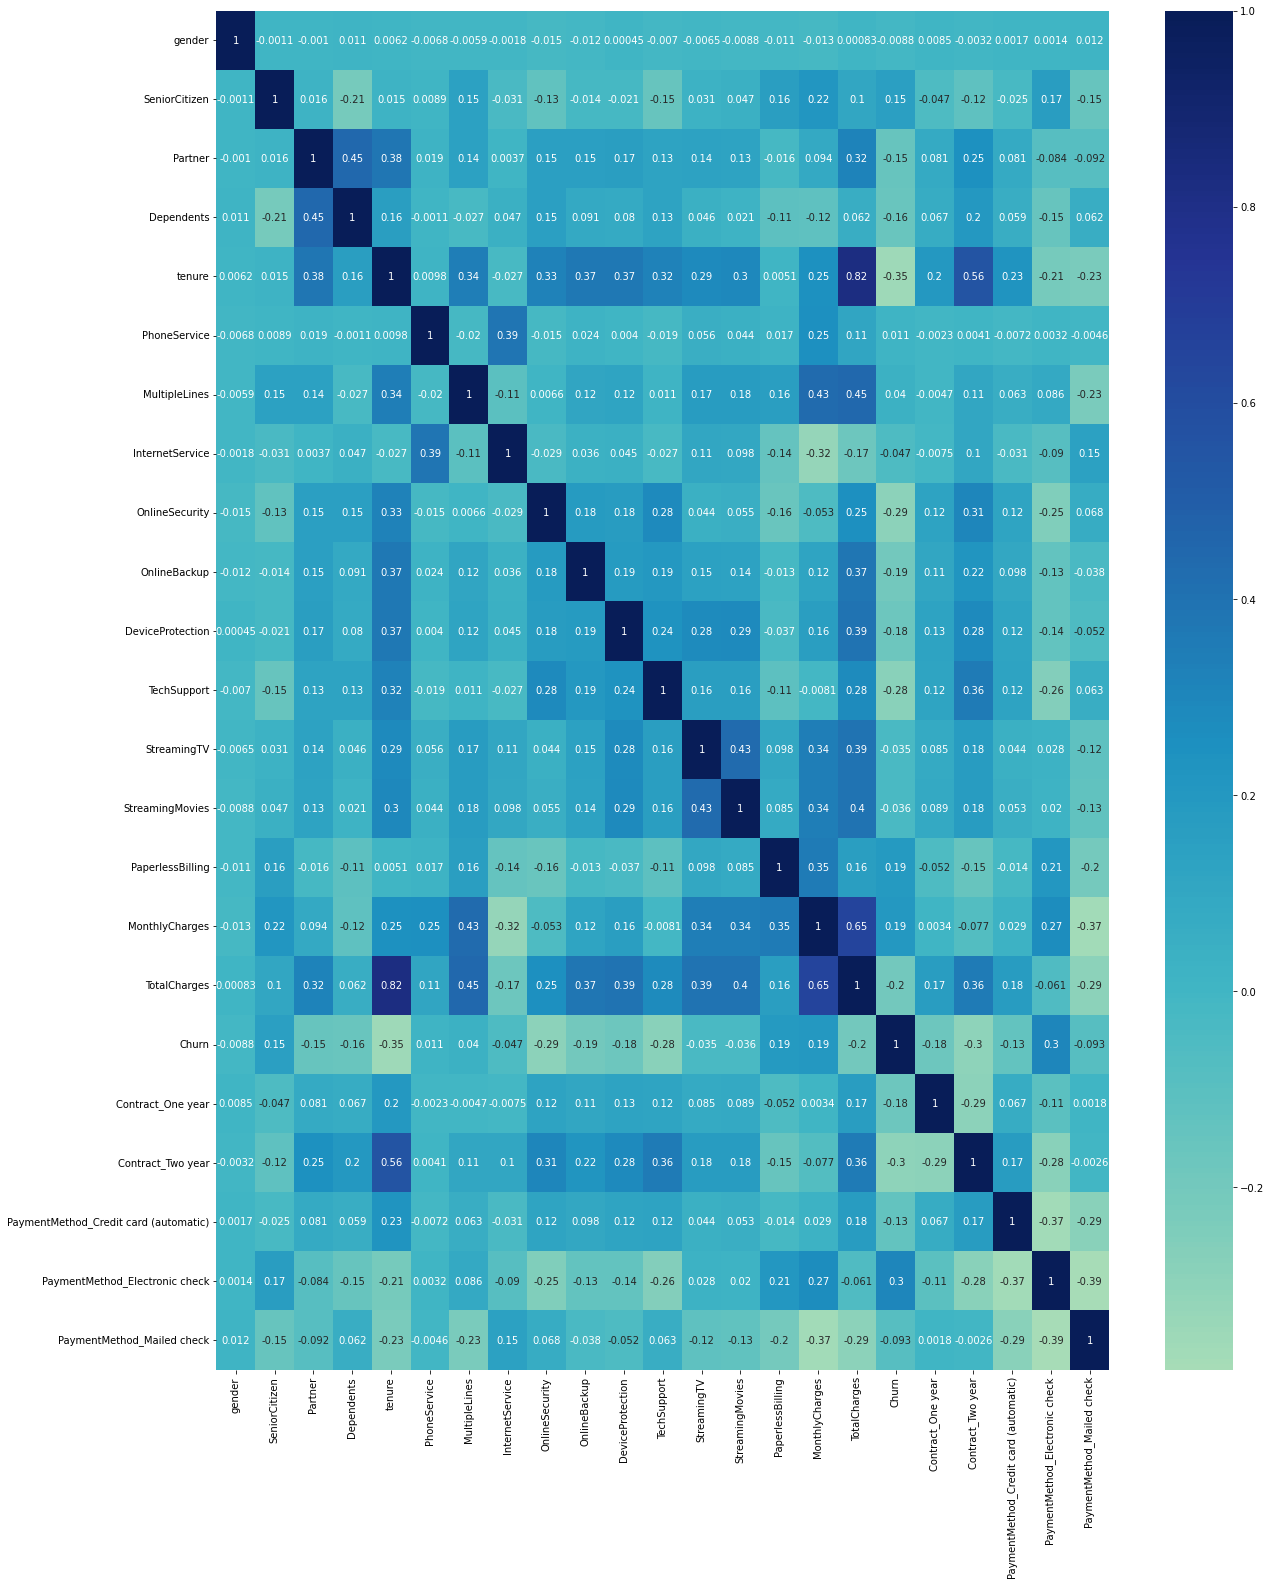

In [48]:
fig, ax = plt.subplots(figsize=(20,25))
sns.heatmap(df_dummy.corr(), cmap="YlGnBu", annot = True, center = 0)

#### Balancing data

In [82]:
X = df_dummy.drop("Churn", axis = 1)
Y = df_dummy['Churn']

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(Y_train.value_counts())

scale = MinMaxScaler()
col = X_train.columns

X_train[col] = scale.fit_transform(X_train[col])
X_test[col] = scale.transform(X_test[col])

0    3630
1    1284
Name: Churn, dtype: int64


In [85]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4914, 22)
(4914,)
(2107, 22)
(2107,)


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
lr_model1 = LogisticRegression()
lr_model1.fit(X_train,Y_train.ravel())
accuracy_lr = lr_model1.score(X_test,Y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.804935927859516


In [87]:
lr_pred= lr_model1.predict(X_test)
report = classification_report(Y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1534
           1       0.68      0.53      0.60       573

    accuracy                           0.80      2107
   macro avg       0.76      0.72      0.73      2107
weighted avg       0.80      0.80      0.80      2107



The value of recall shows us that the model tends toward the majority. Let's correct for this.

In [88]:
print( np.unique( lr_pred ) ) #checking if it is predicting only 1 class

[0 1]


In [90]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_miss, Y_train_miss = nm.fit_resample(X_train, Y_train.ravel())

In [91]:
print('Перед применением метода кол-во меток со значением True: {}'.format(sum(Y_train == True)))
print('Перед применением метода кол-во меток со значением False: {}'.format(sum(Y_train == False)))

print('После применения метода кол-во меток со значением True: {}'.format(sum(Y_train_miss == True)))
print('После применения метода кол-во меток со значением False: {}'.format(sum(Y_train_miss == False)))

Перед применением метода кол-во меток со значением True: 1284
Перед применением метода кол-во меток со значением False: 3630
После применения метода кол-во меток со значением True: 1284
После применения метода кол-во меток со значением False: 1284


In [93]:
lr_model2 = LogisticRegression()
lr_model2.fit(X_train_miss,Y_train_miss.ravel())
accuracy_lr2 = lr_model2.score(X_test,Y_test)
print("Logistic Regression accuracy is :",accuracy_lr2)

Logistic Regression accuracy is : 0.6635026103464642


In [94]:
lr_pred2= lr_model2.predict(X_test)
report2 = classification_report(Y_test,lr_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.88      0.62      0.73      1534
           1       0.43      0.77      0.56       573

    accuracy                           0.66      2107
   macro avg       0.66      0.70      0.64      2107
weighted avg       0.76      0.66      0.68      2107



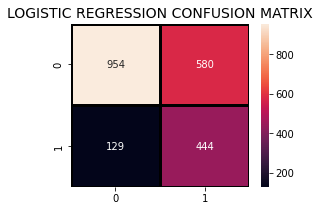

In [96]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, lr_pred2),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

c:\Users\Telli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



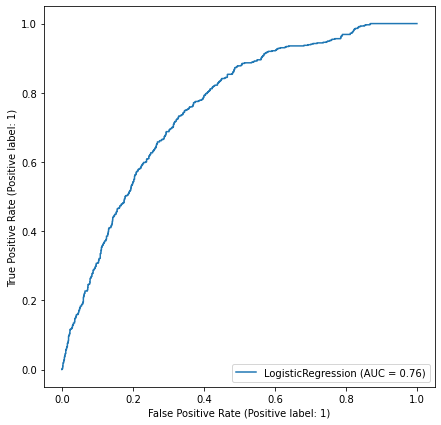

In [97]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
disp = plot_roc_curve(lr_model2, X_test, Y_test)
disp

# Try Random Forests

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_miss, Y_train_miss)
accuracy_rf = rf_model.score(X_test,Y_test)
print("Random Forest Classifier accuracy is :",accuracy_rf)
preds = rf_model.predict(X_test)
print (metrics.accuracy_score(Y_test, preds))

Random Forest Classifier accuracy is : 0.5396298054105363
0.5396298054105363


In [99]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.47      0.60      1534
           1       0.34      0.71      0.46       573

    accuracy                           0.54      2107
   macro avg       0.58      0.59      0.53      2107
weighted avg       0.69      0.54      0.56      2107



# Try Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_miss, Y_train_miss)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,Y_test)
print("Decision Tree accuracy is :",accuracy_dt)
print(classification_report(Y_test, predictdt_y))

Decision Tree accuracy is : 0.536782154722354
              precision    recall  f1-score   support

           0       0.78      0.51      0.61      1534
           1       0.32      0.62      0.42       573

    accuracy                           0.54      2107
   macro avg       0.55      0.56      0.52      2107
weighted avg       0.65      0.54      0.56      2107



## Try KNN Classifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train_miss, Y_train_miss)
predictedknn_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,Y_test)
print("Decision Tree accuracy is :",accuracy_knn)
print(classification_report(Y_test, predictedknn_y))

Decision Tree accuracy is : 0.649264356905553
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      1534
           1       0.41      0.66      0.51       573

    accuracy                           0.65      2107
   macro avg       0.62      0.65      0.62      2107
weighted avg       0.72      0.65      0.67      2107



## Try SVC Classifier

In [103]:
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train_miss, Y_train_miss)
predictedknn_y = svc_model.predict(X_test)
accuracy_knn = svc_model.score(X_test,Y_test)
print("Decision Tree accuracy is :",accuracy_knn)
print(classification_report(Y_test, predictedknn_y))

Decision Tree accuracy is : 0.53156146179402
              precision    recall  f1-score   support

           0       0.84      0.44      0.58      1534
           1       0.34      0.78      0.48       573

    accuracy                           0.53      2107
   macro avg       0.59      0.61      0.53      2107
weighted avg       0.71      0.53      0.55      2107



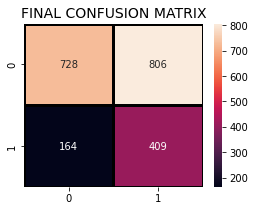

In [104]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

## Try ADABoost Classifier

In [105]:
from sklearn.ensemble import AdaBoostClassifier
a_model = AdaBoostClassifier()
a_model.fit(X_train_miss, Y_train_miss)
a_preds = a_model.predict(X_test)
accuracy_ada = a_model.score(X_test,Y_test)
print("Decision Tree accuracy is :",accuracy_ada)
print(classification_report(Y_test, a_preds))

Decision Tree accuracy is : 0.5904129093497864
              precision    recall  f1-score   support

           0       0.86      0.52      0.65      1534
           1       0.38      0.78      0.51       573

    accuracy                           0.59      2107
   macro avg       0.62      0.65      0.58      2107
weighted avg       0.73      0.59      0.61      2107



## Try Gradient Boosting Classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_miss, Y_train_miss)
gb_pred = gb.predict(X_test)
accuracy_gb = gb.score(X_test,Y_test)
print("Decision Tree accuracy is :",accuracy_gb)
print(classification_report(Y_test, gb_pred))

Decision Tree accuracy is : 0.5571903179876602
              precision    recall  f1-score   support

           0       0.85      0.47      0.61      1534
           1       0.36      0.78      0.49       573

    accuracy                           0.56      2107
   macro avg       0.60      0.63      0.55      2107
weighted avg       0.72      0.56      0.58      2107



## Try Voting Classifier

In [110]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
clf4 = KNeighborsClassifier()
clf5 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('ada', clf3), ('knn', clf4), ('dtc', clf5)], voting='soft')
eclf1.fit(X_train_miss, Y_train_miss)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(Y_test, predictions))

Final Accuracy Score 
0.589938300901756


In [111]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66      1534
           1       0.36      0.69      0.48       573

    accuracy                           0.59      2107
   macro avg       0.60      0.62      0.57      2107
weighted avg       0.70      0.59      0.61      2107



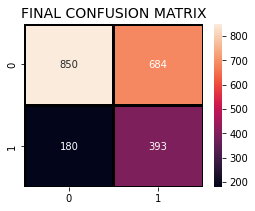

In [112]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

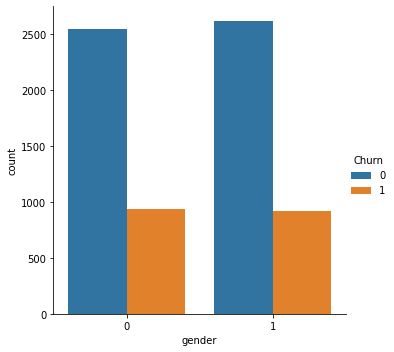

In [113]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=df_dummy,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

# Saving & Loading Models

In [114]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(lr_model2, f)

# load
with open('model.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)

In [115]:
predictions = loaded_model_rf.predict(X_test)

In [116]:
predictions

array([0, 0, 1, ..., 0, 1, 1])